# Validation of the keymark data based parameter fit with extended data from the installation manual for the heatpump Vitocal 200-S AWB-M-E 201.D04

The aim is to model the energetic behavior of heat pump as good as possible with only the few data points from keymark data. In addition, it should be identified which two of the thre variables (P_el, P_th, COP) can be fitted best / easiest / most robust. The other variable can then be calculated.

**Manufacturer Data** as reference (titled **"_ref"**):
- Data is based on installation manual and covers a wide range of input temperatures (-20 °C to +30 °C).
- Data is located in heatpump_wpl_diagramm.csv

**Keymark Data** (titled **"_key"**)
- Data is based on Heatpumpkeymark-Database
- Data is located in heatpump_Vitocal200_keymark.csv

**Fit Data** (titled **"_fit"**)
- The fit of the eletrical power (P_el), thermal power (P_th) and coefficient of performance (COP) is done for **_ref** data as well as for **_key** data
- The fit function is done regarding [[1]] by a least-square fit to identify the parameters (p1, p2, p3) with the funtion `z = p1x + p2y + p3`

[[1]] K. Schwamberger, Modellbildung und Regelung von Gebäudeheizungsanlagen mit Wärmepumpen, Fortschrittberichte VDI (263), ISBN: 9783181463062 

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# function for fitting with relation to T_in and T_out
# x=T_in, y=T_out, z= size to fit

def fit_simple(x,y,z):
    p0=[0.1,0.001,1.] # starting values
    a=(x,y,z) 
    para,_ = scipy.optimize.leastsq(func_simple_zero,p0,args=a)
    return para

def func_simple_zero(para, x, y, z):
    k1,k2,k3 = para
    z_calc = k1*x + k2*y + k3
    z_diff = z_calc - z
    return z_diff

# Function to calculate z using parameters and any x and y:
def func_simple(para, x, y):
    k1,k2,k3 = para
    z = k1*x + k2*y + k3
    return z

## Import manfufacturer data as reference
With the help of the software "EngaugeDigitizer", the reference values of the heatpump were transferred from the graphical plot into a CSV, see "heatpump_Vitocal200_diagramm.png" as PNG and CSV file. The diagramm can be found in "heatpump_Vitocal200_manual.pdf"

In [5]:
data_ref = pd.read_csv('heatpump_Vitocal200_diagramm.csv', delimiter=';', decimal=',')
# calculate COP and quality grade (eta)
K = 273.15
data_ref['T_in'] = data_ref['T_in'].astype(float)
data_ref['T_out'] = data_ref['T_out'].astype(float)
data_ref['COP'] = data_ref['P_th'] / data_ref['P_el']
eta_carnot_ref = (data_ref['T_out']+K) / ((data_ref['T_out']+K)-(data_ref['T_in']+K))
data_ref['eta'] = data_ref ['COP'] / eta_carnot_ref
data_ref.fillna(0, inplace=True)

Text(0, 0.5, 'quality grade')

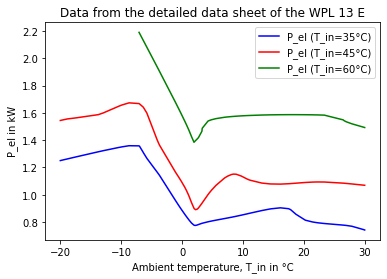

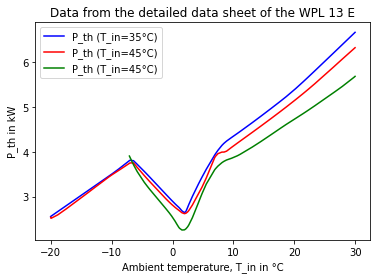

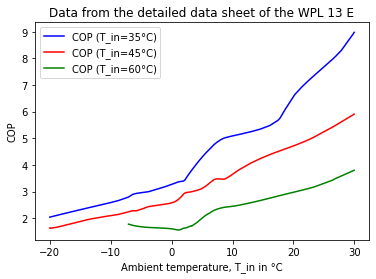

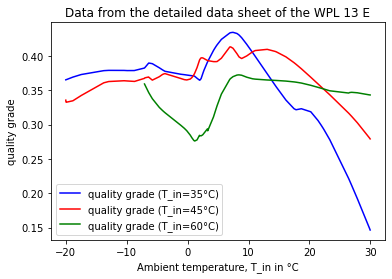

In [6]:
# Plot of the reference data
# P_el
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_el', kind='line', label='P_el (T_in=35°C)', c='Blue',title='Data from the detailed data sheet of the Vitocal 200')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_el', kind='line', label='P_el (T_in=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_el', kind='line', label='P_el (T_in=60°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_el in kW")
# P_th
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_in=35°C)', c='Blue', title='Data from the detailed data sheet of the Vitocal 200')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_in=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_in=45°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_th in kW")
# COP
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_in=35°C)', c='Blue', title='Data from the detailed data sheet of the Vitocal 200')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_in=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_in=60°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("COP")
# eta
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='eta', kind='line', label='quality grade (T_in=35°C)', c='Blue', title='Data from the detailed data sheet of the Vitocal 200')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='eta', kind='line', label='quality grade (T_in=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='eta', kind='line', label='quality grade (T_in=60°C)', c='Green')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("quality grade")

## Import the keymark data
The keymark data from "heatpump_wpl13_keymark.pdf" was transfered to the "heatpump_wpl13_keymark.txt" and is now imported

- [ ] copy index line 4 and 9 and change T_in to 20 °C

In [20]:
data_key = pd.read_csv('heatpump_Vitocal200_keymark.csv', delimiter=';', decimal=',')
# calculate COP and quality grade (eta)
K = 273.15
data_key['T_in'] = data_key['T_in'].astype(float)
data_key['T_out'] = data_key['T_out'].astype(float)
data_key['COP'] = data_key['P_th'] / data_key['P_el']
eta_carnot_key = (data_key['T_out']+K) / ((data_key['T_out']+K)-(data_key['T_in']+K))
data_key['eta'] = data_key ['COP'] / eta_carnot_key
data_key.fillna(0, inplace=True)
data_key

,Manufacturer,Name,T_in,T_out,P_el,P_th,COP,eta
0,Viessmann,Vitocal 200,-7.0,34.0,1.66,4.76,2.867470,0.382765
1,Viessmann,Vitocal 200,2.0,30.0,0.69,3.00,4.347826,0.401581
2,Viessmann,Vitocal 200,7.0,27.0,0.55,3.15,5.727273,0.381627
3,Viessmann,Vitocal 200,12.0,24.0,0.43,3.05,7.093023,0.286442
4,Viessmann,Vitocal 200,-7.0,52.0,2.28,4.63,2.030702,0.368480
5,Viessmann,Vitocal 200,2.0,42.0,1.01,3.11,3.079208,0.390824
6,Viessmann,Vitocal 200,7.0,36.0,0.71,2.97,4.183099,0.392398
7,Viessmann,Vitocal 200,12.0,30.0,0.53,2.91,5.490566,0.326011
8,Viessmann,Vitocal 200,20.0,24.0,0.43,3.05,7.093023,0.095481
9,Viessmann,Vitocal 200,20.0,30.0,0.53,2.91,5.490566,0.181117


## Creating parameter fits for P_el, P_th and COP
To be able to compare data fits from reference data with fits from keymark data, the parameters are calculated with a leat-square fiting method.

In [21]:
variables=['P_el', 'P_th', 'COP']
for var in variables:
    # with reference data
    vars()[var+'_para_ref'] = fit_simple(data_ref['T_in'],data_ref['T_out'],data_ref[var])
    data_ref[var+'_fit'] = func_simple(globals()[var+'_para_ref'], data_ref['T_in'], data_ref['T_out'])
    data_ref[var+'_fit_err'] = (data_ref[var+'_fit'] - data_ref[var]) / data_ref[var] * 100
    d = {'ref': [data_ref[var+'_fit_err'].mean(), data_ref[var+'_fit_err'].max(), data_ref[var+'_fit_err'].min()]}
    vars()[var+'_err'] = pd.DataFrame(d, index=['mean', 'max', 'min'])
    # with keymark data
    vars()[var+'_para_key'] = fit_simple(data_key['T_in'],data_key['T_out'],data_key[var])
    data_key[var+'_fit'] = func_simple(globals()[var+'_para_key'], data_key['T_in'], data_key['T_out'])
    data_key[var+'_fit_err'] = (data_key[var+'_fit'] - data_key[var]) / data_key[var] * 100
    d = data_key[var+'_fit_err'].mean(), data_key[var+'_fit_err'].max(), data_key[var+'_fit_err'].min()
    vars()[var+'_err']['key'] = d

# Save parameters
para_ref = pd.DataFrame(index=['p1', 'p2', 'p3'])
para_key = pd.DataFrame(index=['p1', 'p2', 'p3'])
para_ref['P_el']=P_el_para_ref
para_key['P_el']=P_el_para_key
para_ref['P_th']=P_th_para_ref
para_key['P_th']=P_th_para_key
para_ref['COP']=COP_para_ref
para_key['COP']=COP_para_key

## Comparison between reference data, refrence fit and keymark fit

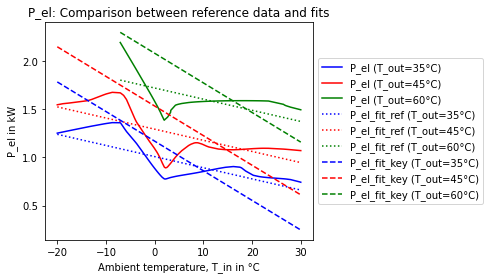

In [22]:
# Calculation for P_el
data_ref['P_el_fit_ref'] = func_simple(para_ref['P_el'], data_ref['T_in'], data_ref['T_out'])
data_ref['P_el_fit_key'] = func_simple(para_key['P_el'], data_ref['T_in'], data_ref['T_out'])
# Plot
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_el', kind='line', label='P_el (T_out=35°C)', c='Blue', title='P_el: Comparison between reference data and fits')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_el', kind='line', label='P_el (T_out=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_el', kind='line', label='P_el (T_out=60°C)', c='Green')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_el_fit_ref', kind='line', label='P_el_fit_ref (T_out=35°C)', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_el_fit_ref', kind='line', label='P_el_fit_ref (T_out=45°C)', c='Red', linestyle=':')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_el_fit_ref', kind='line', label='P_el_fit_ref (T_out=60°C)', c='Green', linestyle=':')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_el_fit_key', kind='line', label='P_el_fit_key (T_out=35°C)', c='Blue', linestyle='--')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_el_fit_key', kind='line', label='P_el_fit_key (T_out=45°C)', c='Red', linestyle='--')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_el_fit_key', kind='line', label='P_el_fit_key (T_out=60°C)', c='Green', linestyle='--')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_el in kW")
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Conclusion for P_el:**
- The fit bases on reference data is very good and has a maximum deviation of only 0,25 kW which corresponds to aprox. 6 % of the maximum electrical power consumtpion.
- The fit based on keymark data underestimates the electrical power at high input with low output temperatures and overestimates the eletrical power at low input and high output temperatures.
- Still the maximum deviation is only 0,5 kW which corresponds to aprox. 13 % of the maximum electrical power consumtpion.

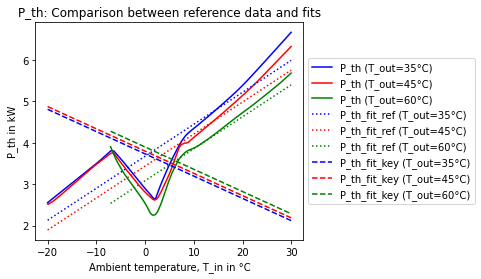

In [23]:
# Calculation for P_th
data_ref['P_th_fit_ref'] = func_simple(para_ref['P_th'], data_ref['T_in'], data_ref['T_out'])
data_ref['P_th_fit_key'] = func_simple(para_key['P_th'], data_ref['T_in'], data_ref['T_out'])
# Plot
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_out=35°C)', c='Blue', title='P_th: Comparison between reference data and fits')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_out=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_out=60°C)', c='Green')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th_fit_ref', kind='line', label='P_th_fit_ref (T_out=35°C)', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_th_fit_ref', kind='line', label='P_th_fit_ref (T_out=45°C)', c='Red', linestyle=':')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_th_fit_ref', kind='line', label='P_th_fit_ref (T_out=60°C)', c='Green', linestyle=':')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_fit_key (T_out=35°C)', c='Blue', linestyle='--')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_fit_key (T_out=45°C)', c='Red', linestyle='--')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_fit_key (T_out=60°C)', c='Green', linestyle='--')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_th in kW")
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Conclusion for P_th:**
- The fit bases on reference data is very good and has a maximum deviation of only 1 kW which corresponds to aprox. 7 % of the maximum electrical power consumtpion.
- The fit based on keymark data underestimates the thermal power at high input temperatures. The maximum deviation is 3 kW which corresponds to aprox. 21 % of the maximum thermal power generation.

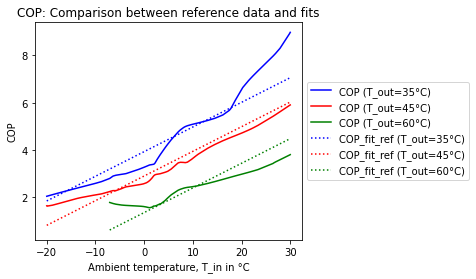

In [24]:
# Calculation for COP
data_ref['COP_fit_ref'] = func_simple(para_ref['COP'], data_ref['T_in'], data_ref['T_out'])
data_ref['COP_fit_key'] = func_simple(para_key['COP'], data_ref['T_in'], data_ref['T_out'])
data_ref['COP_calc_key'] = data_ref['P_th_fit_key'] / data_ref['P_el_fit_key']
# Plot reference data vs reference fit
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_out=35°C)', c='Blue', title='COP: Comparison between reference data and fits')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_out=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_out=60°C)', c='Green')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='COP_fit_ref', kind='line', label='COP_fit_ref (T_out=35°C)', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='COP_fit_ref', kind='line', label='COP_fit_ref (T_out=45°C)', c='Red', linestyle=':')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='COP_fit_ref', kind='line', label='COP_fit_ref (T_out=60°C)', c='Green', linestyle=':')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("COP")
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

- The fit bases on reference data is good and has a maximum deviation of 0,3 which corresponds to aprox. 6 % of the maximum COP.

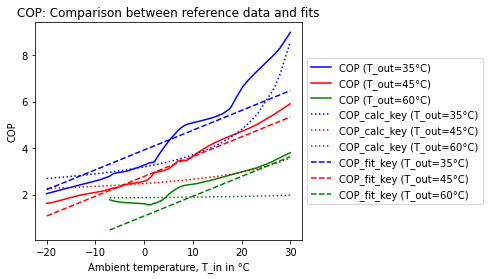

In [26]:
# Plot reference data vs calculated data (P_th_fit / P_el_fit) and keymark fit
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_out=35°C)', c='Blue', title='COP: Comparison between reference data and fits')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_out=45°C)', c='Red')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='COP', kind='line', label='COP (T_out=60°C)', c='Green')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='COP_calc_key', kind='line', label='COP_calc_key (T_out=35°C)', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='COP_calc_key', kind='line', label='COP_calc_key (T_out=45°C)', c='Red', linestyle=':')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='COP_calc_key', kind='line', label='COP_calc_key (T_out=60°C)', c='Green', linestyle=':')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='COP_fit_key (T_out=35°C)', c='Blue', linestyle='--')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='COP_fit_key (T_out=45°C)', c='Red', linestyle='--')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='COP_fit_key', kind='line', label='COP_fit_key (T_out=60°C)', c='Green', linestyle='--')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("COP")
box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Conclusion for COP:**
- For low (35°C) and middle (50°C) temperatures the fitted COP has lower deviation as the calculated COP from fitted P_el and P_th.
- Only and very high output temperatures (65°C) and low input temperatures (< 0°C) the calclulated COP is better

** Therefore, the fit of the COP is preffered against the fit of the thermal power.**

## Calculate P_th from fitted P_el and fitted COP


Text(0, 0.5, 'P_th in kW')

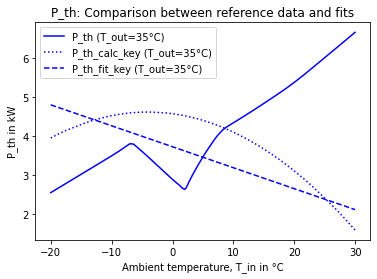

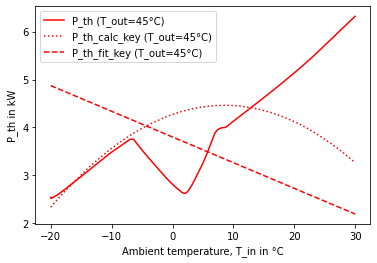

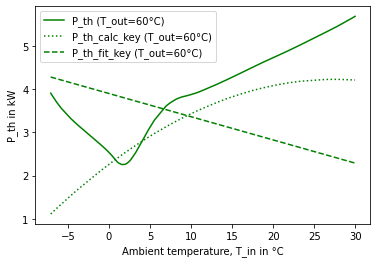

In [29]:
data_ref['P_th_calc_key'] = data_ref['COP_fit_key'] * data_ref['P_el_fit_key']
# Plot reference data vs calculated data (P_th_fit / P_el_fit) and keymark fit
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_out=35°C)', c='Blue', title='P_th: Comparison between reference data and fits')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th_calc_key', kind='line', label='P_th_calc_key (T_out=35°C)', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_fit_key (T_out=35°C)', c='Blue', linestyle='--')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_th in kW")
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_out=45°C)', c='Red')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_th_calc_key', kind='line', label='P_th_calc_key (T_out=45°C)', c='Red', linestyle=':')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_fit_key (T_out=45°C)', c='Red', linestyle='--')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_th in kW")
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_th', kind='line', label='P_th (T_out=60°C)', c='Green')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_th_calc_key', kind='line', label='P_th_calc_key (T_out=60°C)', c='Green', linestyle=':')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='P_th_fit_key', kind='line', label='P_th_fit_key (T_out=60°C)', c='Green', linestyle='--')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("P_th in kW")

**Conclusion for P_th:**
- Calculated P_th from fitted COP and fitted P_el is better than fitted P_th

## Calculate quality grade from fitted COP
As a final proof, the quality grade (eta) is calculated from the preffered method of fitted COP

Text(0, 0.5, 'eta in kW')

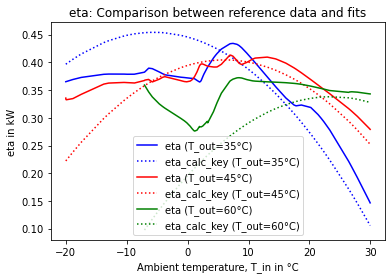

In [30]:
data_ref['eta_calc_key'] = data_ref['COP_fit_key'] / eta_carnot_ref
# Plot reference data vs calculated data
fig, axes = plt.subplots(nrows=1, ncols=1)
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='eta', kind='line', label='eta (T_out=35°C)', c='Blue', title='eta: Comparison between reference data and fits')
data_ref[data_ref['T_out']==35].plot(ax=axes, x='T_in', y='eta_calc_key', kind='line', label='eta_calc_key (T_out=35°C)', c='Blue', linestyle=':')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='eta', kind='line', label='eta (T_out=45°C)', c='Red')
data_ref[data_ref['T_out']==45].plot(ax=axes, x='T_in', y='eta_calc_key', kind='line', label='eta_calc_key (T_out=45°C)', c='Red', linestyle=':')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='eta', kind='line', label='eta (T_out=60°C)', c='Green')
data_ref[data_ref['T_out']==60].plot(ax=axes, x='T_in', y='eta_calc_key', kind='line', label='eta_calc_key (T_out=60°C)', c='Green', linestyle=':')
axes.set_xlabel("Ambient temperature, T_in in °C")
axes.set_ylabel("eta in kW")


**Conclusion for calculated eta**:
- The calculated quality grade based on the fit is relatively good for a target temperature of up to 50 °C.
- As also the other plots showed up: The qualitiy grad is underestimated at high output temperatures together with low input temperatures

## Conclusion fot fitting method:
** The fit of the COP and P_el are the prefered methods. The corresponding thermal power ca then be calculated**

# Comparison of results from reference fit with keymark fit in a one year simulation
Input data (outside temperature and flow temperature from heat sink) are available in 1-minute resolution from a TRNSYS-Simulation 

In [31]:
# import data
data = pd.read_csv('Test-Year.csv', delimiter=';', decimal=',')
data['datetime'] = pd.date_range("2018-01-01", periods=525600, freq="1min")
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.set_index(pd.DatetimeIndex(data['datetime']))
data = data.drop('datetime', axis=1)

In [32]:
# Calculate data for P_el and COP
variables=['P_el','COP']
for var in variables:
    data[var+'_fit_ref'] = func_simple(para_ref[var], data['T_in'], data['T_out'])
    data[var+'_fit_key'] = func_simple(para_key[var], data['T_in'], data['T_out'])

data.loc[data['T_out'] == 0, ['P_el_fit_ref','P_el_fit_key','COP_fit_ref','COP_fit_key']] = 0 # Set 0 where the heat pump was not running
# Calculate data for COP 
var='P_th'
data[var+'_fit_ref'] = data['COP_fit_ref'] * data['P_el_fit_ref']
data[var+'_fit_key'] = data['COP_fit_key'] * data['P_el_fit_key']
data.loc[data['T_out'] == 0, ['P_th_fit_ref','P_th_fit_key']] = 0 # Set 0 where the heat pump was not running


(0.0, 120000.0)

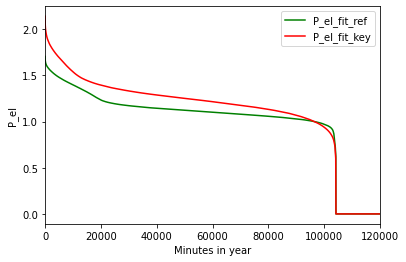

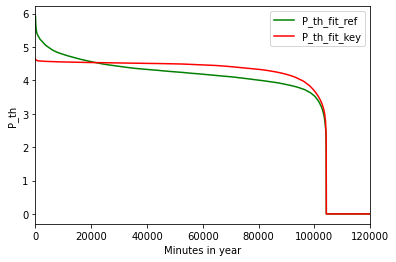

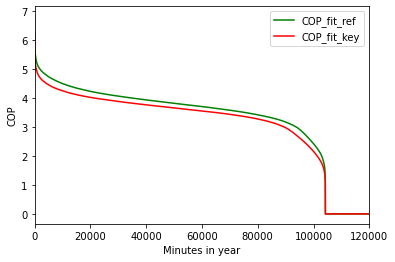

In [33]:
# Duration curves
# P_el
fig, axes = plt.subplots(nrows=1, ncols=1)
data_sort = data.sort_values(by=['P_el_fit_ref'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_el_fit_ref', kind='line', c='Green')
data_sort = data.sort_values(by=['P_el_fit_key'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_el_fit_key', kind='line', c='Red')
axes.set_title ='Comparison of electrical performance'
axes.set_xlabel("Minutes in year")
axes.set_ylabel("P_el")
axes.set_xlim(0,120000)
# P_th
fig, axes = plt.subplots(nrows=1, ncols=1)
data_sort = data.sort_values(by=['P_th_fit_ref'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_th_fit_ref', kind='line', c='Green')
data_sort = data.sort_values(by=['P_th_fit_key'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='P_th_fit_key', kind='line', c='Red')
axes.set_title ='Comparison of thermal performance'
axes.set_xlabel("Minutes in year")
axes.set_ylabel("P_th")
axes.set_xlim(0,120000)
# COP
fig, axes = plt.subplots(nrows=1, ncols=1)
data_sort = data.sort_values(by=['COP_fit_ref'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='COP_fit_ref', kind='line', c='Green')
data_sort = data.sort_values(by=['COP_fit_key'], ascending=False).reset_index()
data_sort.plot(ax=axes, y='COP_fit_key', kind='line', c='Red')
axes.set_title ='Comparison of the COPs'
axes.set_xlabel("Minutes in year")
axes.set_ylabel("COP")
axes.set_xlim(0,120000)

In [34]:
# Seasonal Performance Factor (SPF)
SPF_fit_ref = data['P_th_fit_ref'].mean() / data['P_el_fit_ref'].mean()
print(SPF_fit_ref)
SPF_fit_key = data['P_th_fit_key'].mean() / data['P_el_fit_key'].mean()
print(SPF_fit_key)
# Deviation of only 1%

3.6909414469446062
3.464411843538722


Text(0, 0.5, 'SPF')

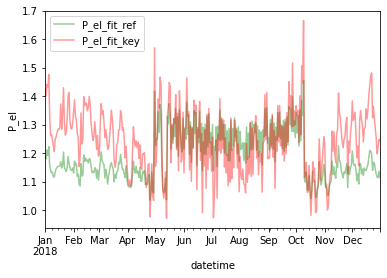

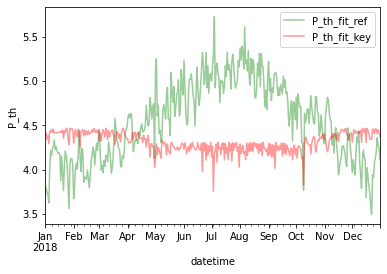

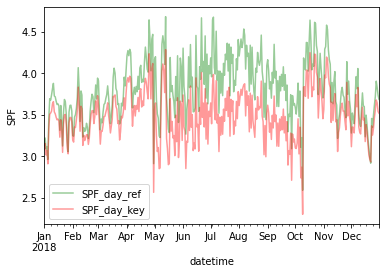

In [35]:
# Line-Plots
data_day = data.replace(0, np.NaN)
data_day = data_day.groupby(pd.Grouper(freq='D')).mean()
data_day['SPF_day_ref'] = data_day['P_th_fit_ref'] / data_day['P_el_fit_ref']
data_day['SPF_day_key'] = data_day['P_th_fit_key'] / data_day['P_el_fit_key']
# P_el as mean value, on daily basis, when turned on
fig, axes = plt.subplots(nrows=1, ncols=1)
data_day.plot(ax=axes, y='P_el_fit_ref', kind='line', c='Green', alpha=0.4)
data_day.plot(ax=axes, y='P_el_fit_key', kind='line', c='Red', alpha=0.4)
axes.set_title ='Comparison of electrical performance'
axes.set_ylabel("P_el")
# P_th as mean value, on daily basis, when turned on
fig, axes = plt.subplots(nrows=1, ncols=1)
data_day.plot(ax=axes, y='P_th_fit_ref', kind='line', c='Green', alpha=0.4)
data_day.plot(ax=axes, y='P_th_fit_key', kind='line', c='Red', alpha=0.4)
axes.set_title ='Comparison of thermal performance'
axes.set_ylabel("P_th")
# SPF on daily basis
fig, axes = plt.subplots(nrows=1, ncols=1)
data_day.plot(ax=axes, y='SPF_day_ref', kind='line', c='Green', alpha=0.4)
data_day.plot(ax=axes, y='SPF_day_key', kind='line', c='Red', alpha=0.4)
axes.set_title ='SPF on daily basis'
axes.set_ylabel("SPF")
